In [11]:
#Python


In [15]:
%%cython 
cimport numpy as np
#cimport scipy as scp

In [2]:
import scipy as scp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
complex_sample_set= scp.fromfile(open('filename2.32fc'), dtype = scp.float32)
def conjugate_multiplier(cmplx):
    return cmplx*np.conjugate(cmplx)
vect = np.vectorize(conjugate_multiplier)
power = vect(complex_sample_set)
#complex_sample_set = np.fft.fft(complex_samples)

1953


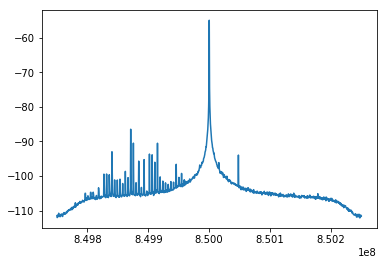

In [3]:
diff = len(complex_sample_set)/1024
print diff
reshaped = power[1024:1024*diff].reshape((diff-1),1024)
section = np.average(reshaped,axis = 0)
freq_dist = sorted(np.add(np.fft.fftfreq(len(section),d= 1.0/5e5),850e6))
plt.plot(freq_dist, 10*np.log10(section))
plt.show()
#sip = zip(freq_dist,section)
#import pandas as pd
#pd.DataFrame(sip, columns=['frq','pwr']).to_csv('freq_power.csv')

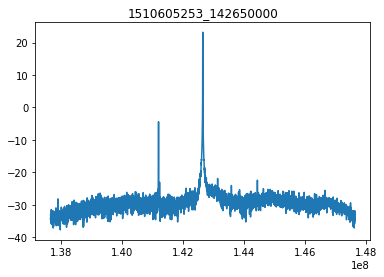

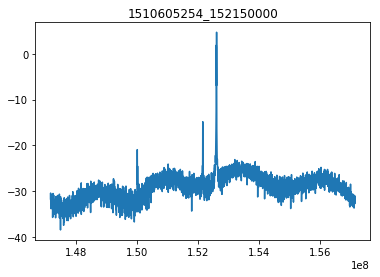

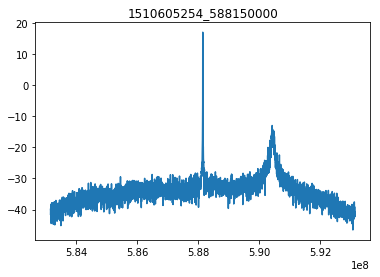

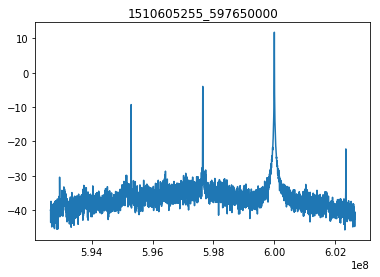

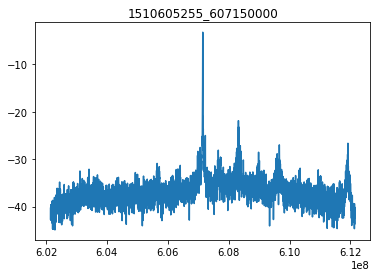

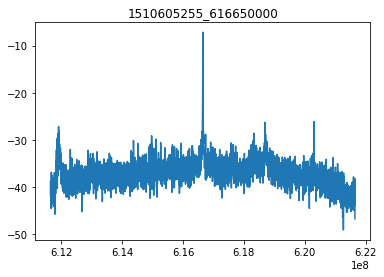

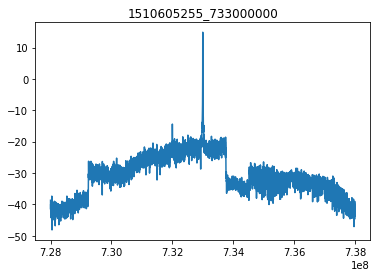

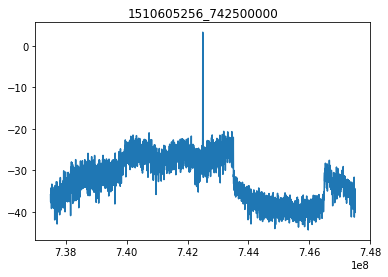

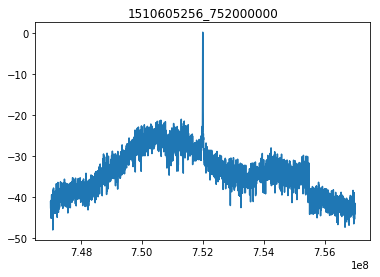

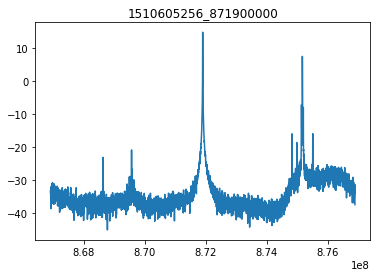

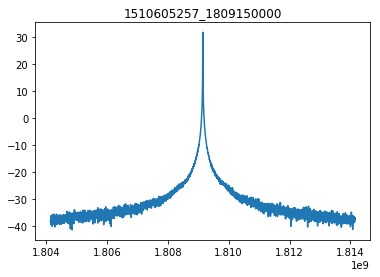

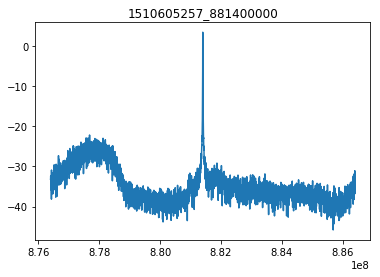

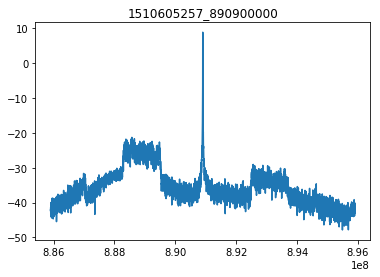

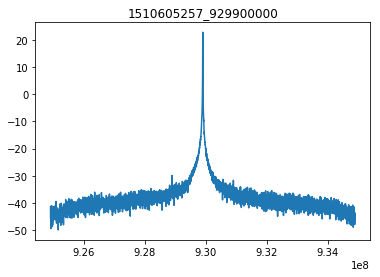

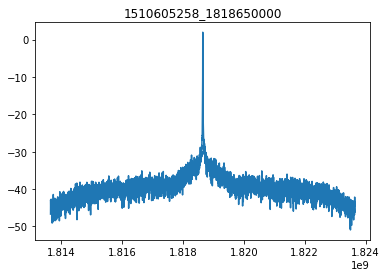

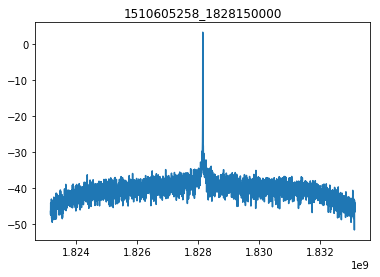

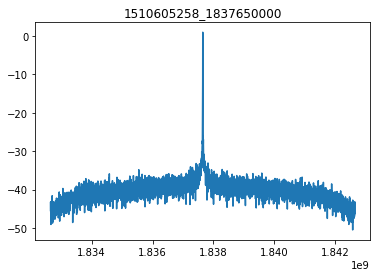

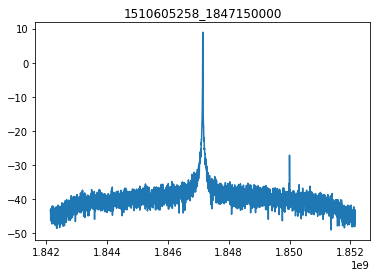

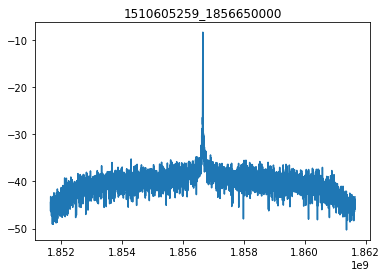

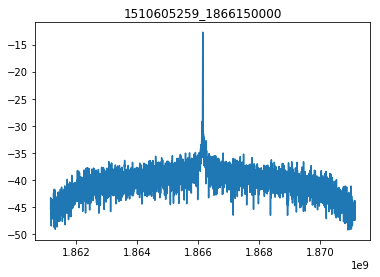

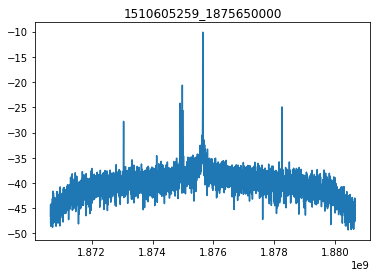

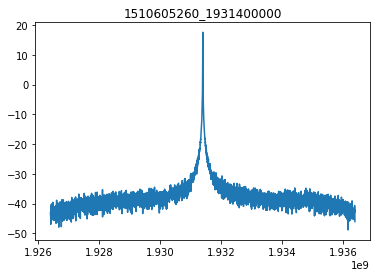

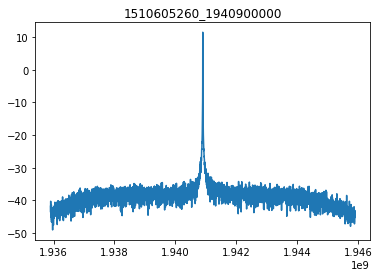

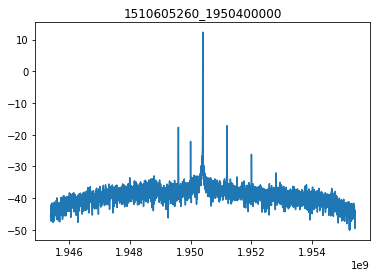

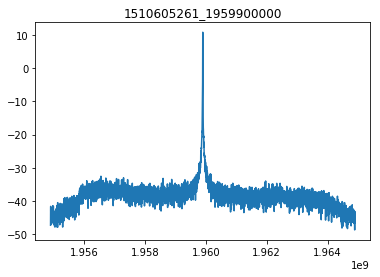

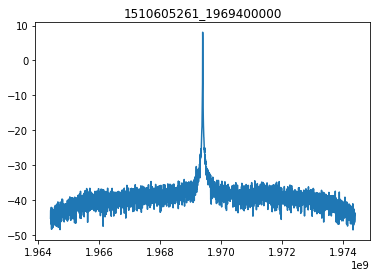

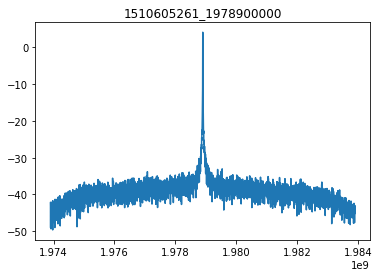

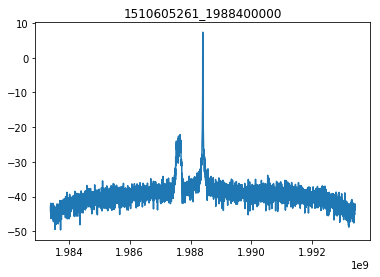

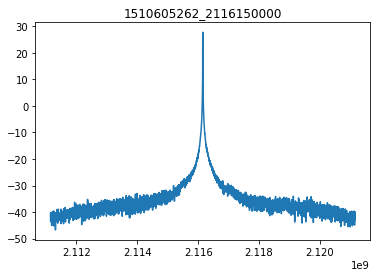

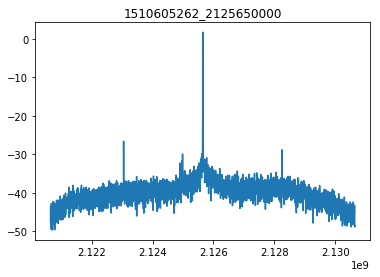

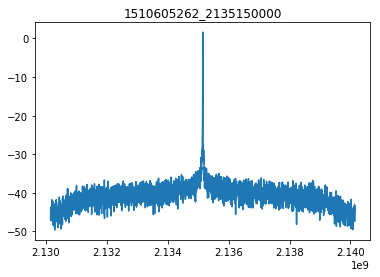

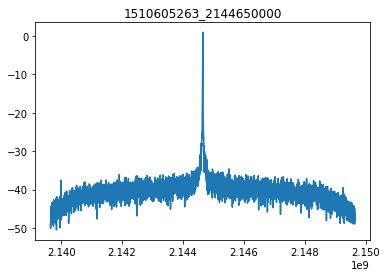

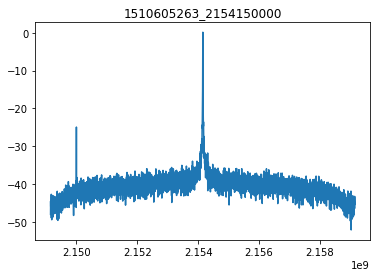

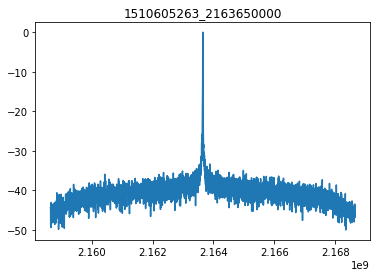

In [4]:
import pandas as pd
import glob
import os
if not os.path.exists('figures'):
    os.makedirs('figures')
for f in glob.glob('fft_averages/*.csv'):
    filename = f.split('/')[-1].split('-')[0].split('.')[0]
    data = pd.read_csv(f)
    fig, ax = plt.subplots()
    ax.plot(data['1'].values,10*np.log10(data['0'].values))
    ax.set_title(filename)
    fig.savefig('figures/'+filename+'.jpg')
    plt.show()

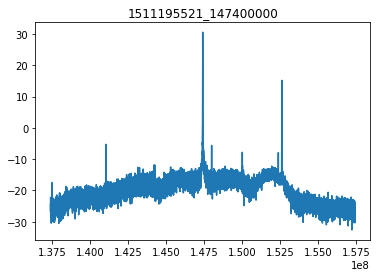

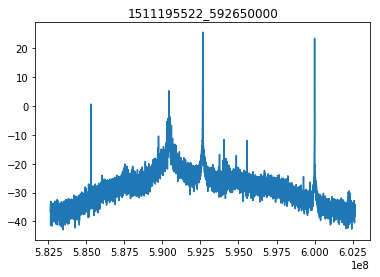

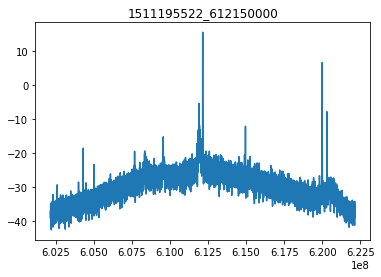

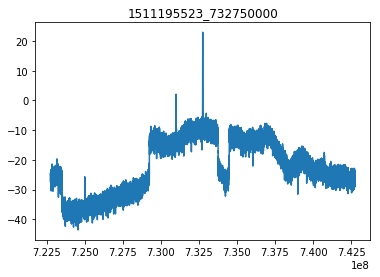

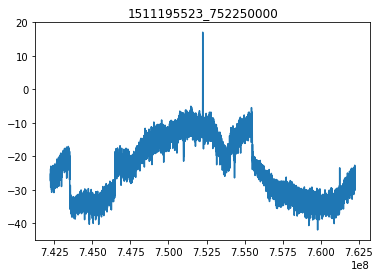

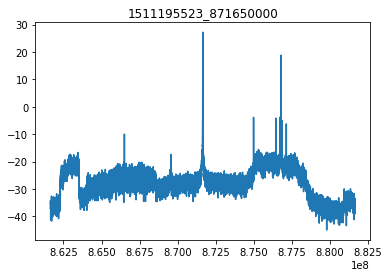

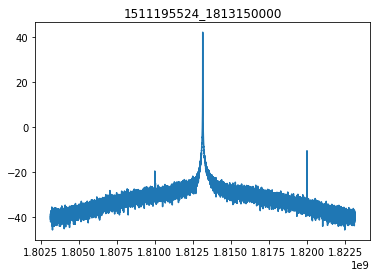

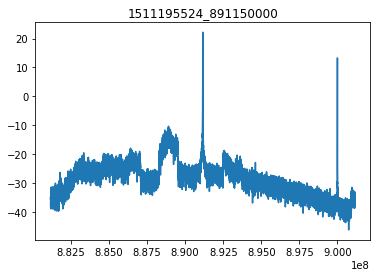

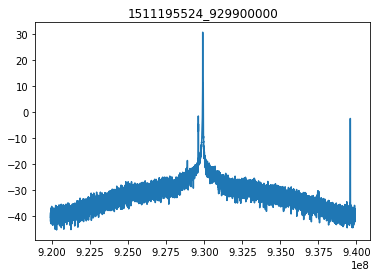

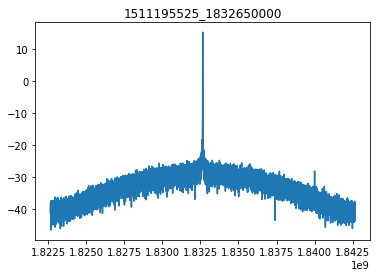

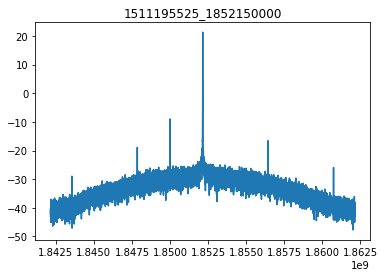

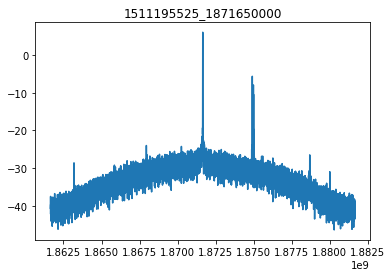

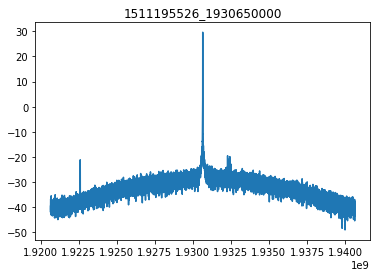

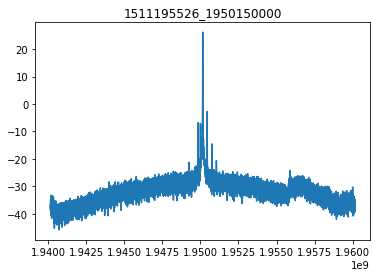

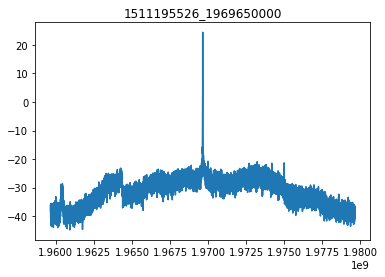

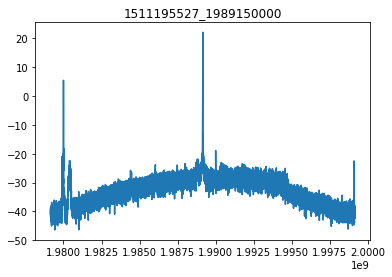

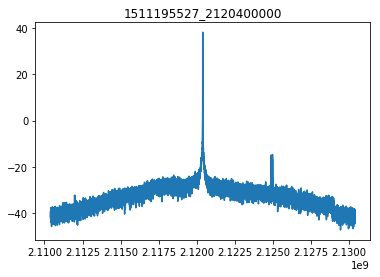

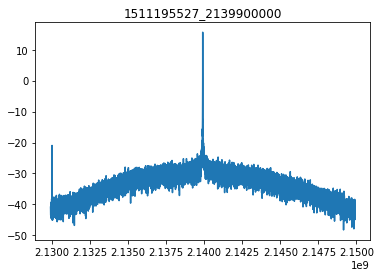

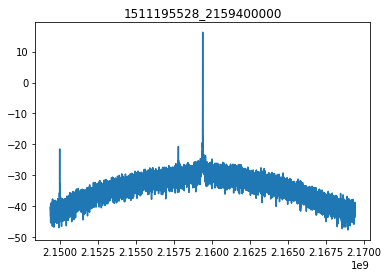

In [3]:
import pandas as pd
import glob
import os
if not os.path.exists('figures'):
    os.makedirs('figures')
for f in glob.glob('ffts_with20sps/*.csv'):
    filename = f.split('/')[-1].split('-')[0].split('.')[0]
    data = pd.read_csv(f)
    fig, ax = plt.subplots()
    ax.plot(data['1'].values,10*np.log10(data['0'].values))
    ax.set_title(filename)
    fig.savefig('figures/'+filename+'.jpg')
    plt.show()

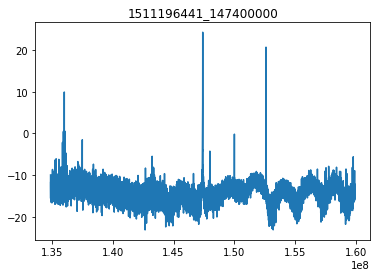

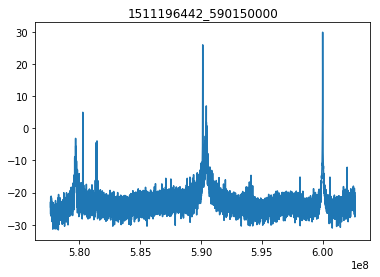

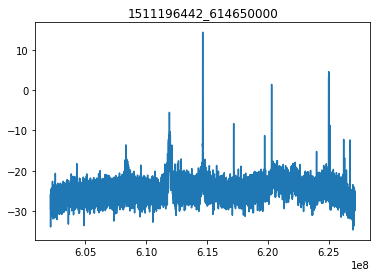

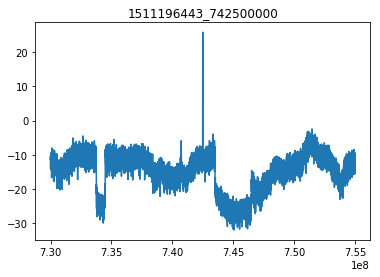

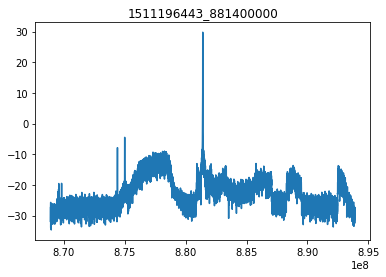

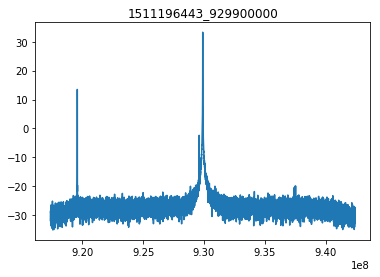

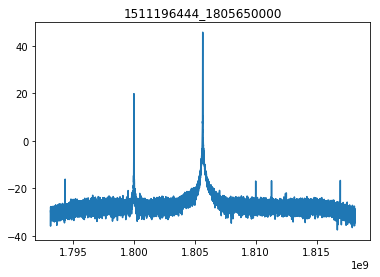

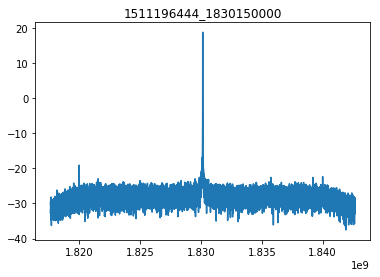

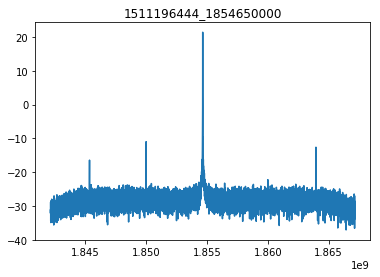

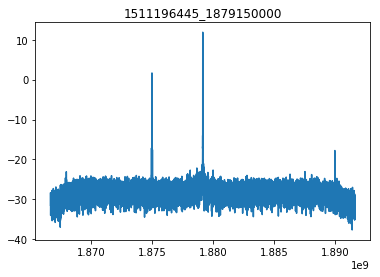

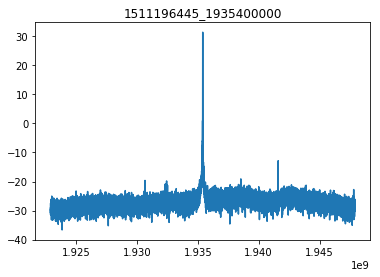

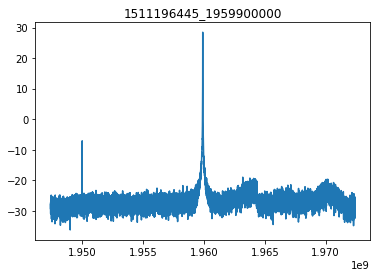

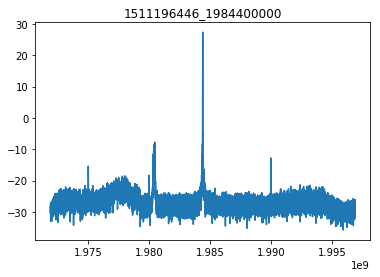

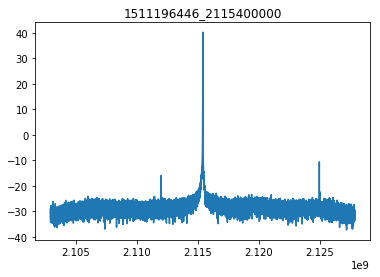

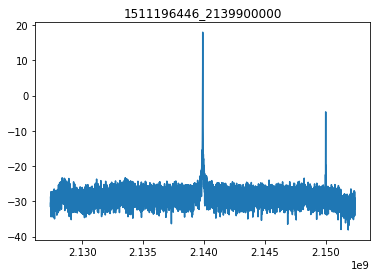

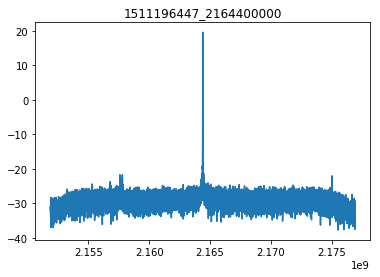

In [4]:
import pandas as pd
import glob
import os
if not os.path.exists('figures'):
    os.makedirs('figures')
for f in glob.glob('ffts_with25sps/*.csv'):
    filename = f.split('/')[-1].split('-')[0].split('.')[0]
    data = pd.read_csv(f)
    fig, ax = plt.subplots()
    ax.plot(data['1'].values,10*np.log10(data['0'].values))
    ax.set_title(filename)
    fig.savefig('figures/'+filename+'.jpg')
    plt.show()

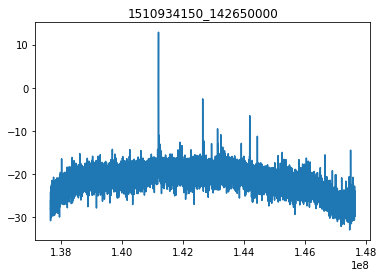

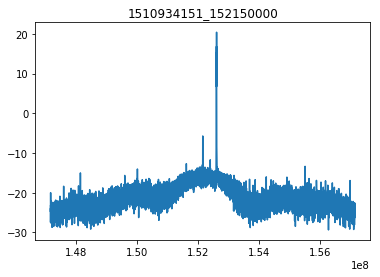

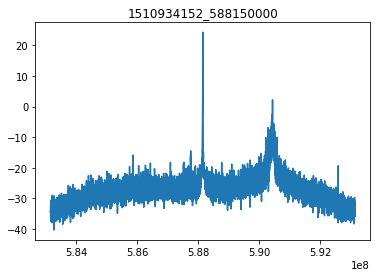

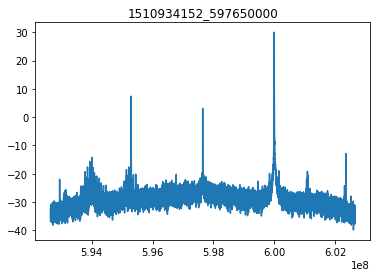

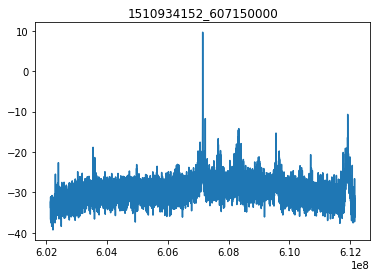

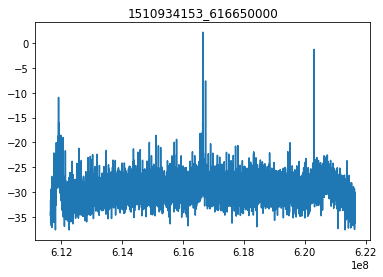

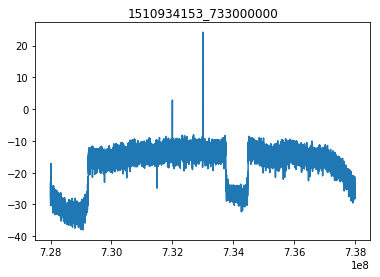

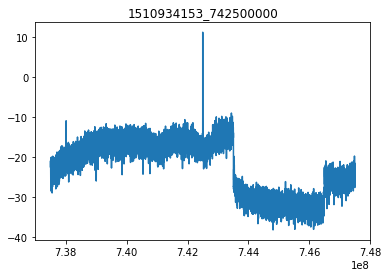

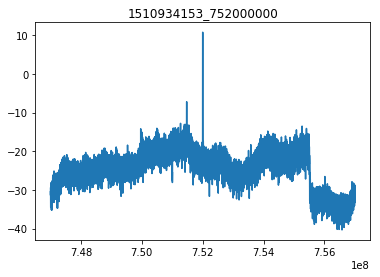

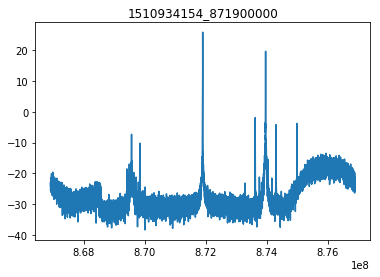

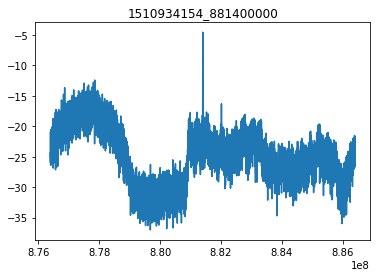

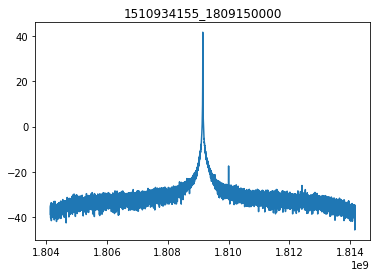

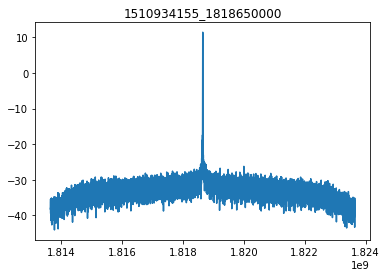

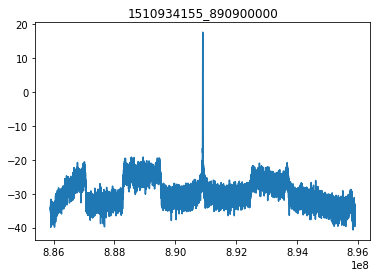

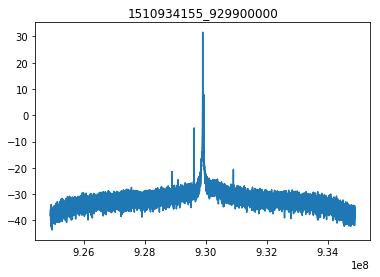

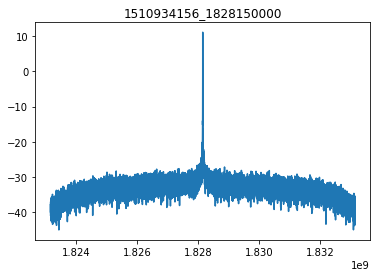

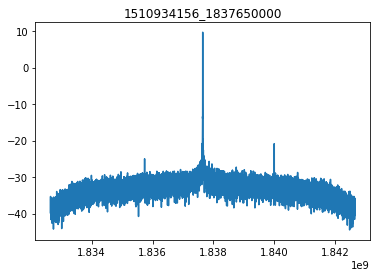

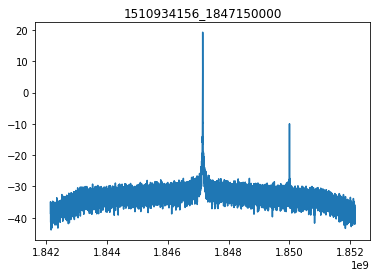

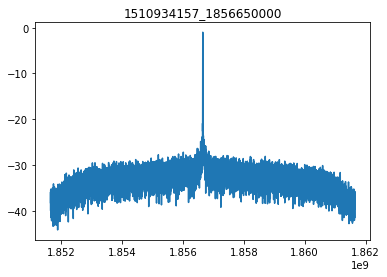

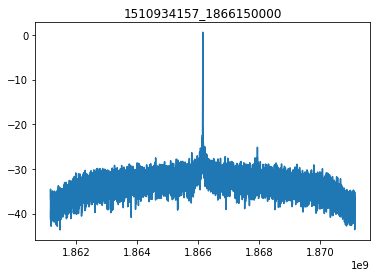

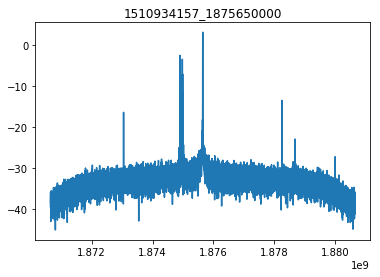

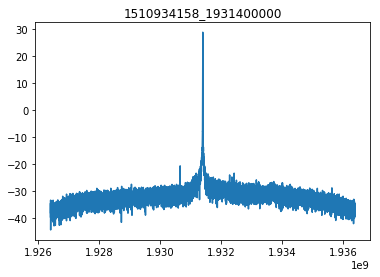

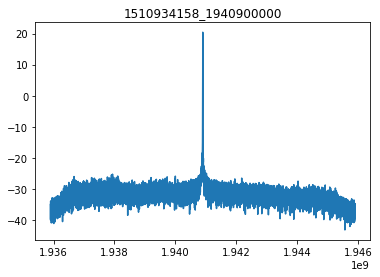

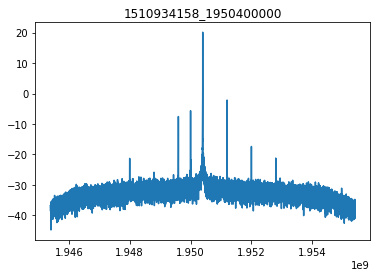

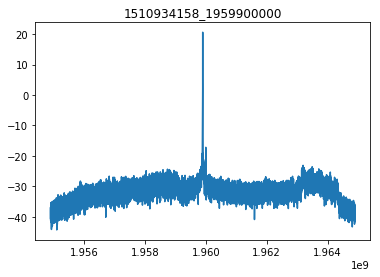

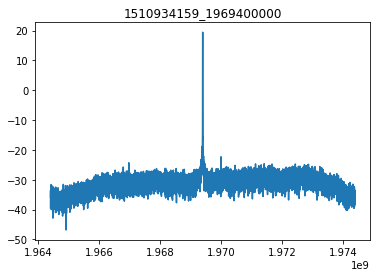

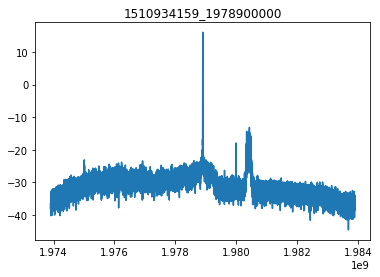

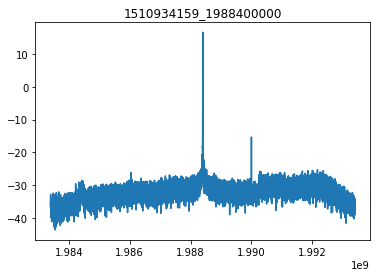

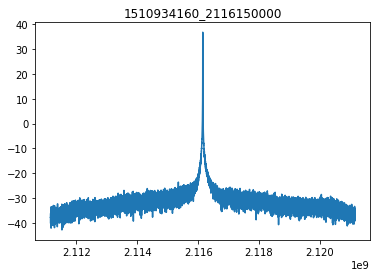

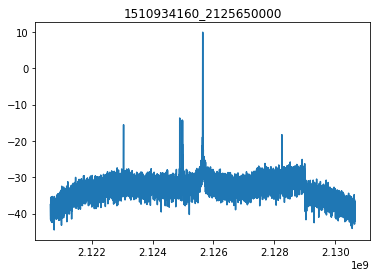

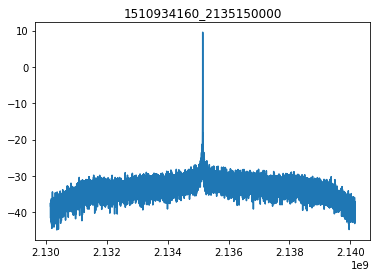

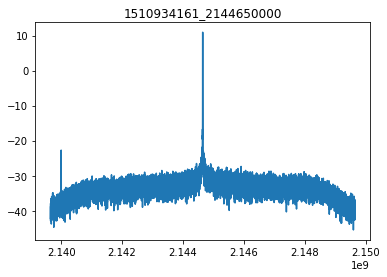

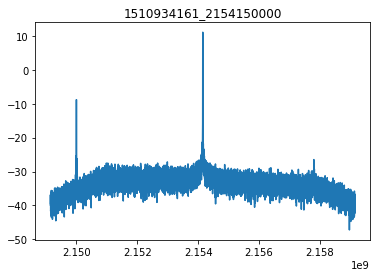

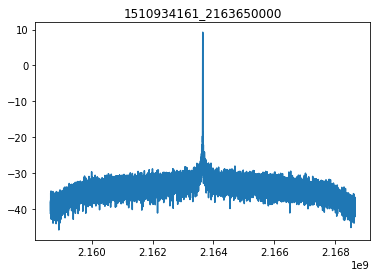

In [7]:
import pandas as pd
import glob
import os
if not os.path.exists('figures'):
    os.makedirs('figures')
for f in glob.glob('larger_fft/*.csv'):
    filename = f.split('/')[-1].split('-')[0].split('.')[0]
    data = pd.read_csv(f)
    fig, ax = plt.subplots()
    ax.plot(data['1'].values,10*np.log10(data['0'].values))
    ax.set_title(filename)
    fig.savefig('figures/'+filename+'.jpg')
    plt.show()

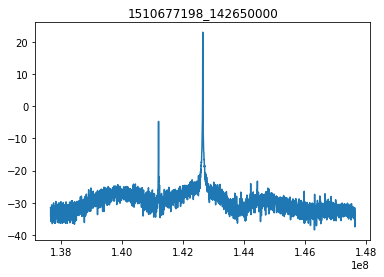

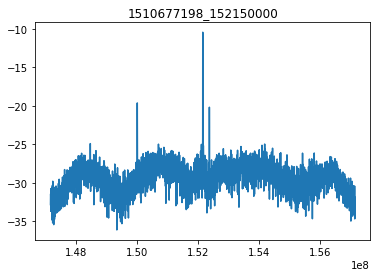

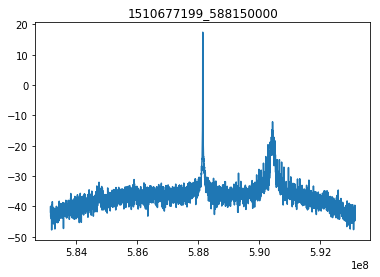

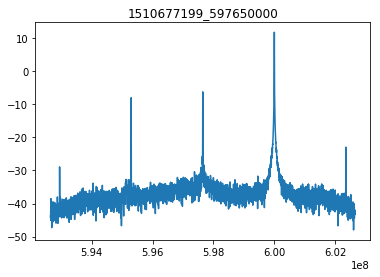

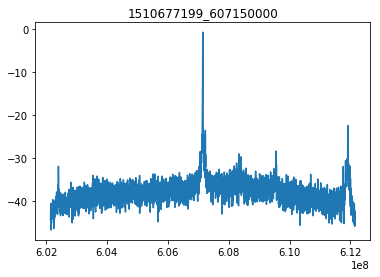

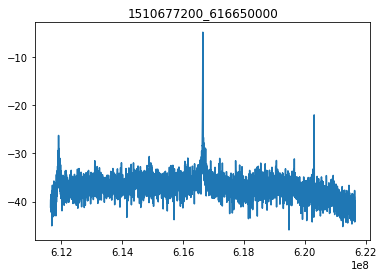

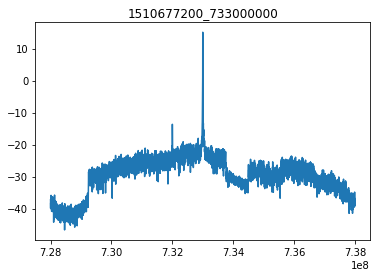

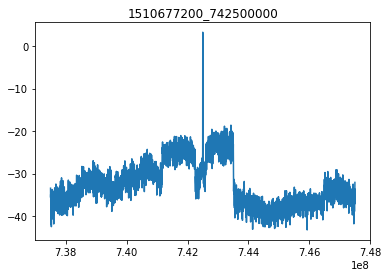

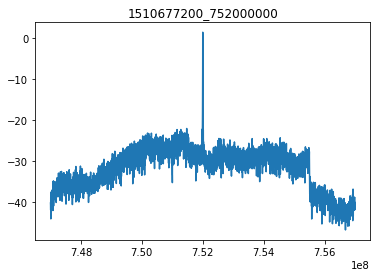

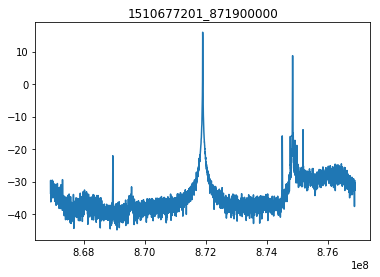

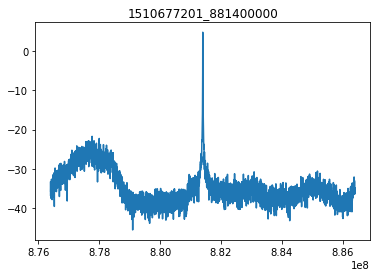

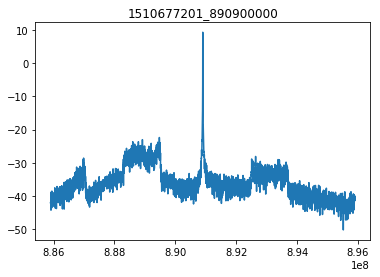

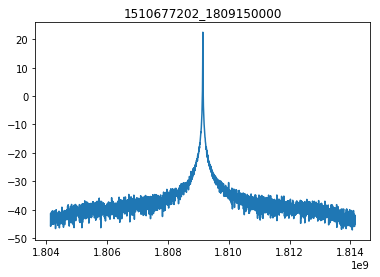

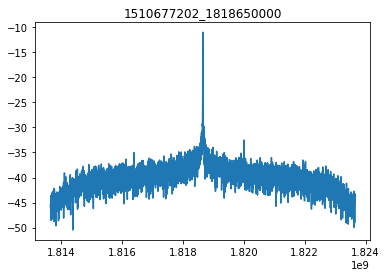

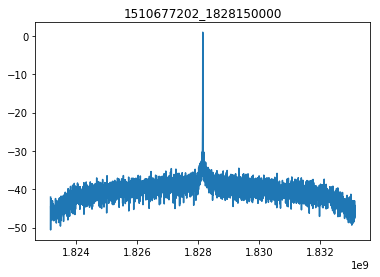

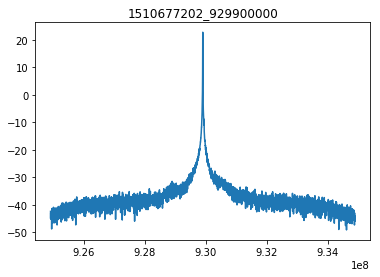

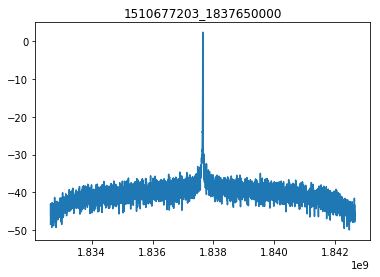

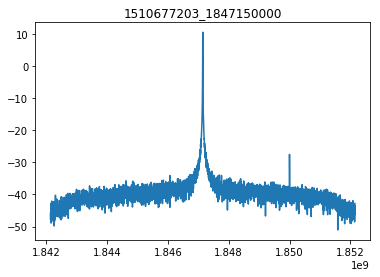

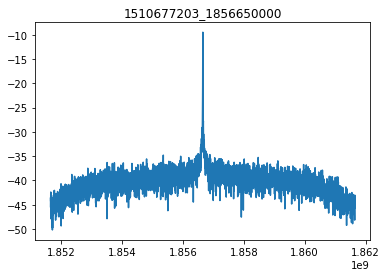

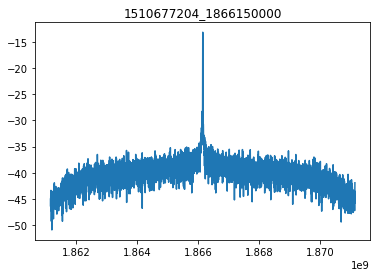

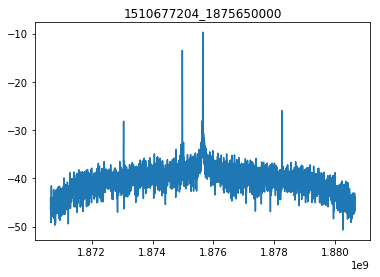

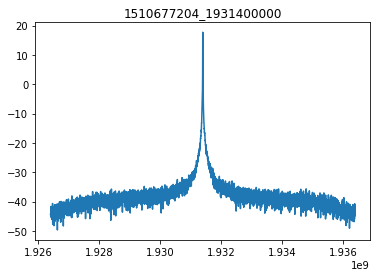

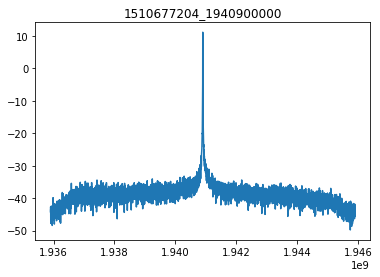

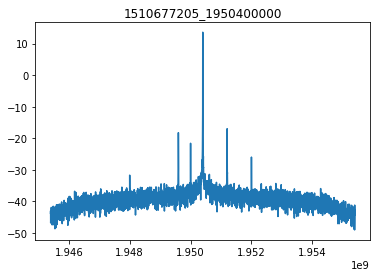

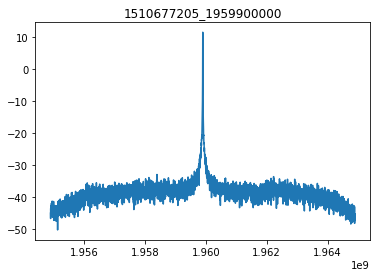

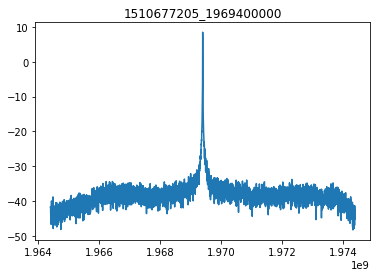

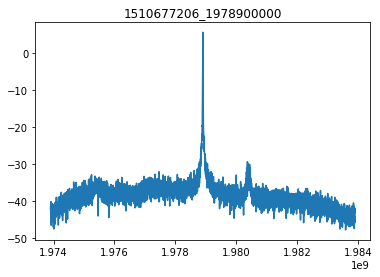

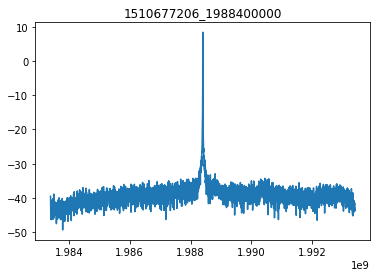

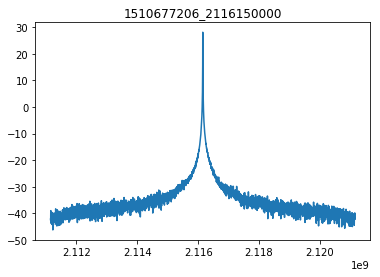

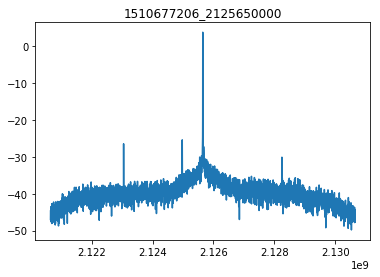

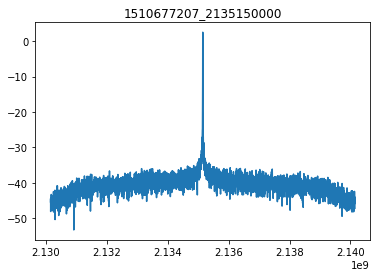

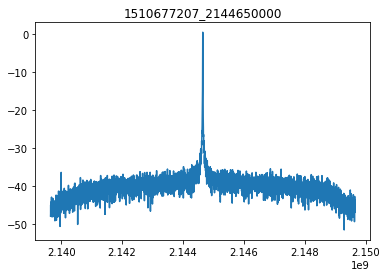

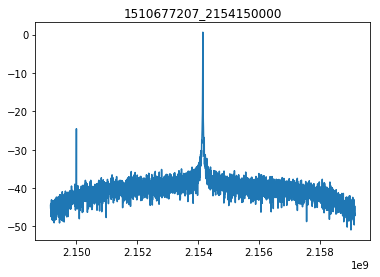

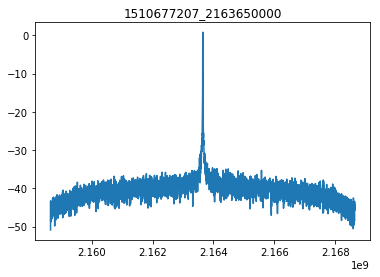

In [5]:
import pandas as pd
import glob
import os
import numpy
if not os.path.exists('figures'):
    os.makedirs('figures')
def to_float(cmplx):
    cmpl = cmplx.split(')')[0].strip().split('(')[-1].strip().split('+')[0]
    return float(cmpl)
#print to_float('(0.000635619275272+0j)')
for f in glob.glob('fft_avers/*.csv'):
    filename = f.split('/')[-1].split('-')[0].split('.')[0]
    data = pd.read_csv(f)
    fig, ax = plt.subplots()
    y=np.vectorize(to_float)(data['0'].values)
    x=np.vectorize(to_float)(data['1'].values)
    #ax.plot(data['1'].values,data['0'].values)
    ax.plot(x,10*np.log10(y))
    ax.set_title(filename)
    fig.savefig('figures/'+filename+'.jpg')
    plt.show()

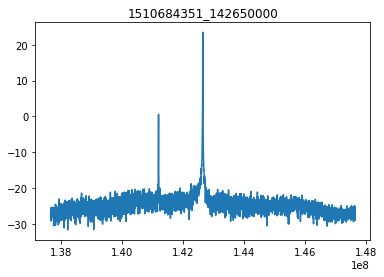

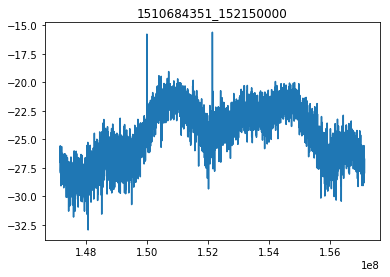

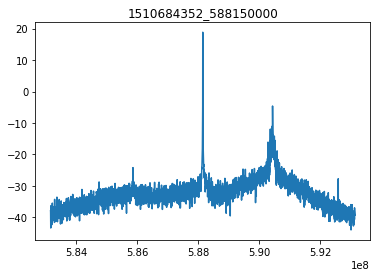

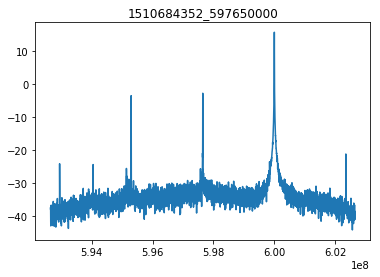

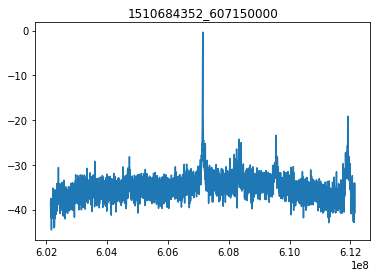

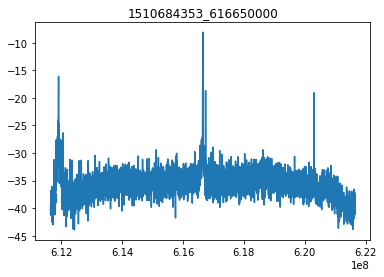

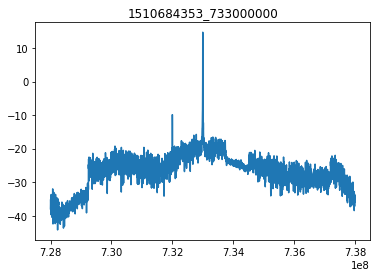

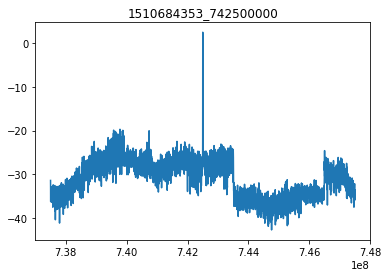

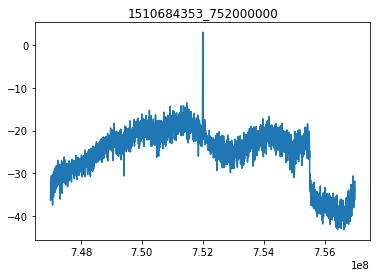

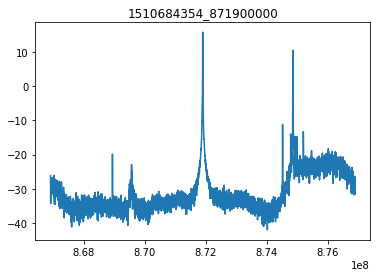

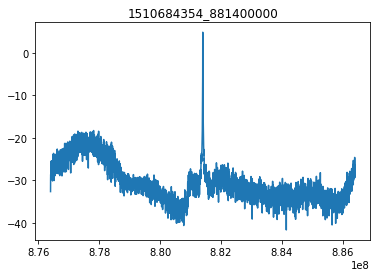

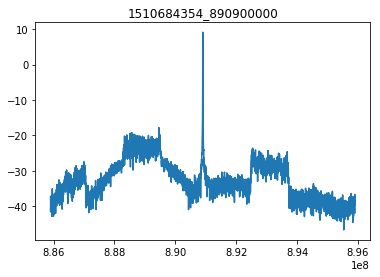

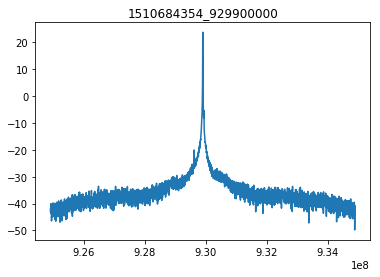

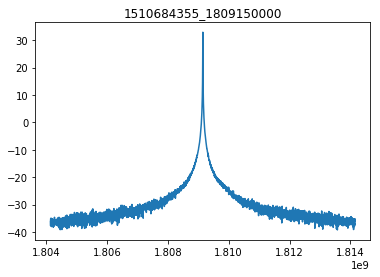

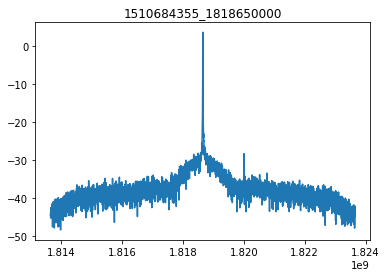

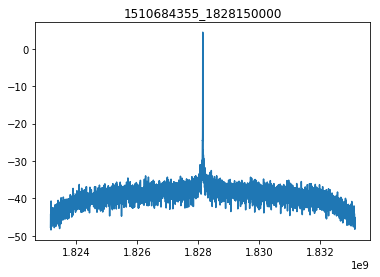

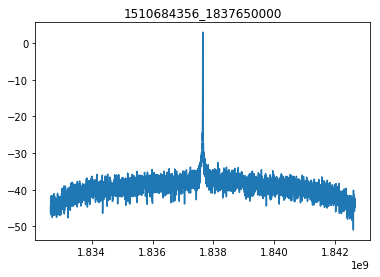

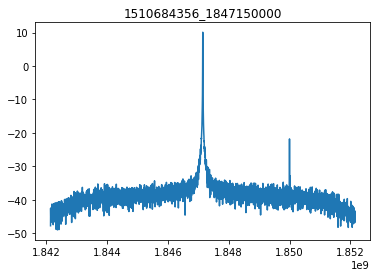

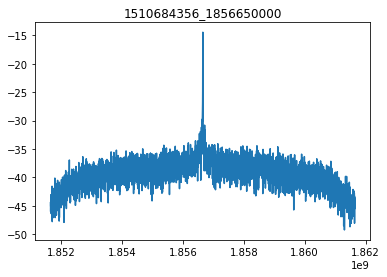

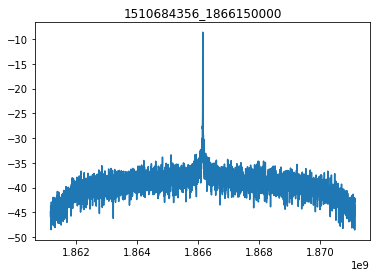

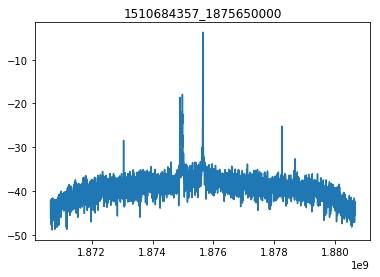

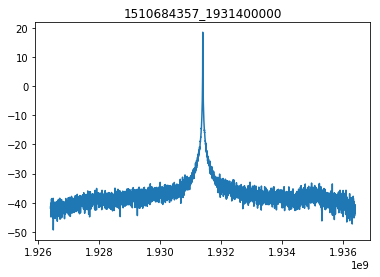

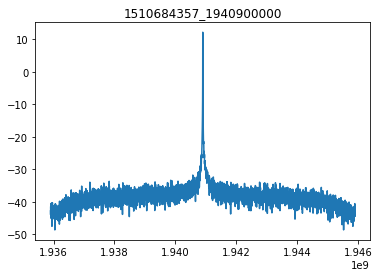

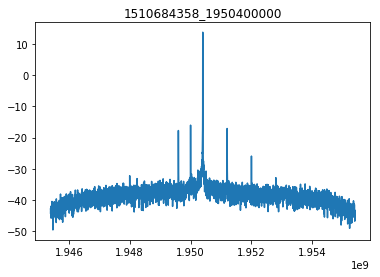

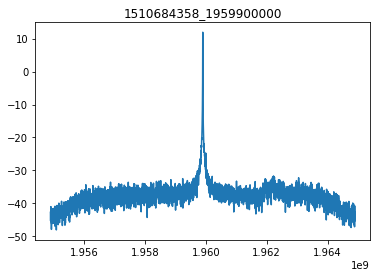

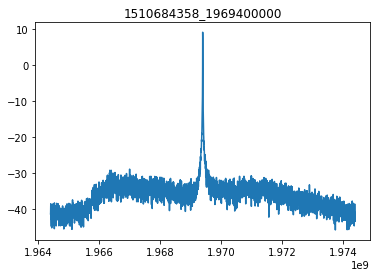

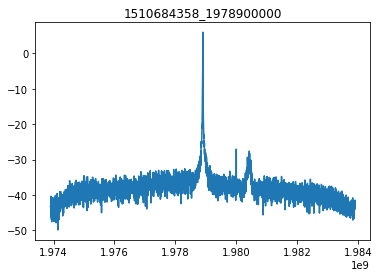

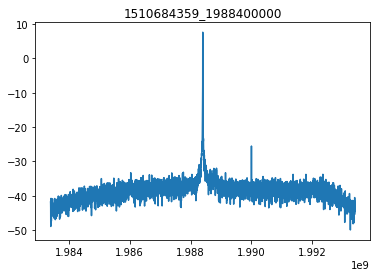

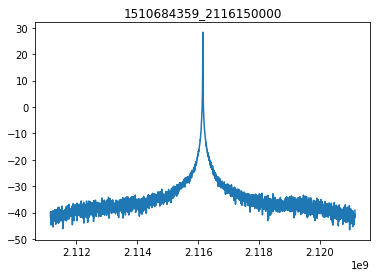

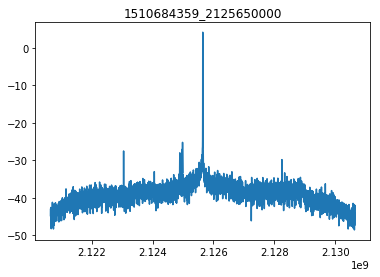

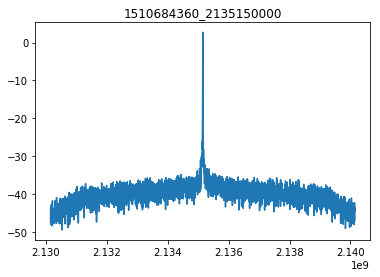

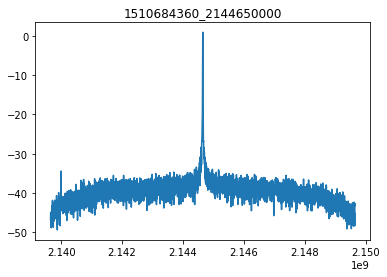

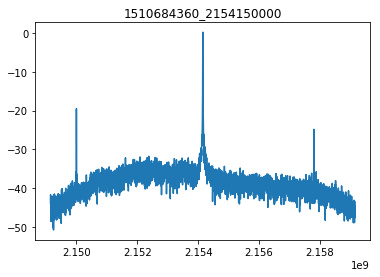

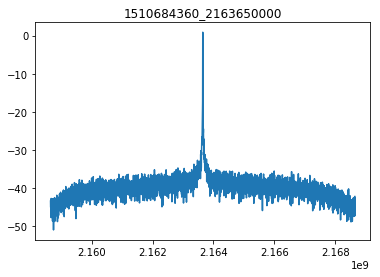

In [6]:
import pandas as pd
import glob
import os
if not os.path.exists('figures'):
    os.makedirs('figures')
for f in glob.glob('other_ffts/*.csv'):
    filename = f.split('/')[-1].split('-')[0].split('.')[0]
    data = pd.read_csv(f)
    fig, ax = plt.subplots()
    ax.plot(data['1'].values,10*np.log10(data['0'].values))
    ax.set_title(filename)
    fig.savefig('figures/'+filename+'.jpg')
    plt.show()

In [15]:
data['1']

0       1.376500e+08
1       1.376524e+08
2       1.376549e+08
3       1.376573e+08
4       1.376598e+08
5       1.376622e+08
6       1.376646e+08
7       1.376671e+08
8       1.376695e+08
9       1.376720e+08
10      1.376744e+08
11      1.376769e+08
12      1.376793e+08
13      1.376817e+08
14      1.376842e+08
15      1.376866e+08
16      1.376891e+08
17      1.376915e+08
18      1.376939e+08
19      1.376964e+08
20      1.376988e+08
21      1.377013e+08
22      1.377037e+08
23      1.377062e+08
24      1.377086e+08
25      1.377110e+08
26      1.377135e+08
27      1.377159e+08
28      1.377184e+08
29      1.377208e+08
            ...     
4066    1.475768e+08
4067    1.475792e+08
4068    1.475816e+08
4069    1.475841e+08
4070    1.475865e+08
4071    1.475890e+08
4072    1.475914e+08
4073    1.475938e+08
4074    1.475963e+08
4075    1.475987e+08
4076    1.476012e+08
4077    1.476036e+08
4078    1.476061e+08
4079    1.476085e+08
4080    1.476109e+08
4081    1.476134e+08
4082    1.476

In [3]:
#GNU radio command
#uhd_rx_cfile -a "addr=192.168.10.2" -A TX/RX -s 20e6 -g 25 -f 850e6 --samp_rate=500k -N 5M secondSample.32fc
    #agr:
        #-s-> use shorts instead of complex float
        #-gain->gain in dB
        #-f -> Center frequency 
        #--samp_rate > sample rate
        #-N ->number of samples to be recorded
        #-A -> recieve, transmit, or both
sample_file = scp.fromfile(open('secondSample.32fc'), dtype = scp.int16)
to_float = sample_file.astype(np.float32)
complex_sampls = sample_file.astype(np.float32).view(np.complex64)
complex_sample_set = scp.fromfile(open('thirdSample.32fc'), dtype = scp.complex64)
cut_offs = 10000
length = len(complex_sample_set)

complex_samples = complex_sample_set[cut_offs:length-cut_offs]



In [4]:
complex_samples[0:30]


array([-0.00082400-0.00231941j, -0.00082400-0.00238045j,
       -0.00085452-0.00228889j, -0.00088504-0.00234993j,
       -0.00088504-0.00241097j, -0.00094608-0.00234993j,
       -0.00085452-0.00228889j, -0.00091556-0.00231941j,
       -0.00082400-0.00241097j, -0.00085452-0.00234993j,
       -0.00079348-0.00234993j, -0.00079348-0.00241097j,
       -0.00079348-0.00244149j, -0.00076296-0.00234993j,
       -0.00079348-0.00231941j, -0.00082400-0.00238045j,
       -0.00079348-0.00228889j, -0.00085452-0.00238045j,
       -0.00100711-0.00241097j, -0.00088504-0.00234993j,
       -0.00091556-0.00238045j, -0.00088504-0.00228889j,
       -0.00085452-0.00234993j, -0.00085452-0.00231941j,
       -0.00079348-0.00234993j, -0.00082400-0.00234993j,
       -0.00088504-0.00228889j, -0.00085452-0.00225838j,
       -0.00085452-0.00225838j, -0.00085452-0.00234993j], dtype=complex64)

In [44]:
import numpy as np
def has(h):
    return h**2
vect = np.vectorize(has)
vect(n)

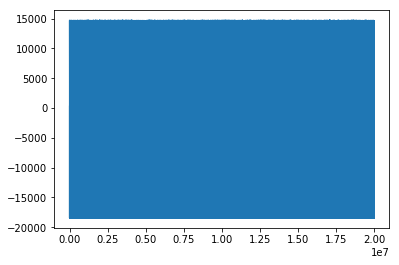

In [6]:
freq_distr = np.arange(len(sample_file))
plt.plot(freq_distr, sample_file)
plt.show()

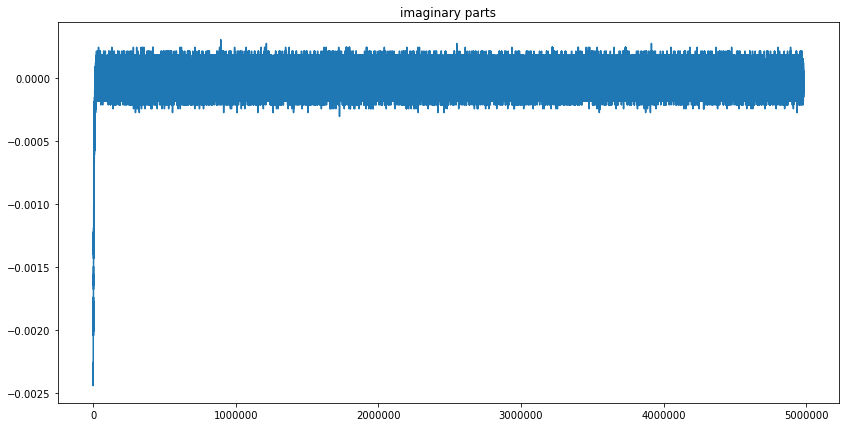

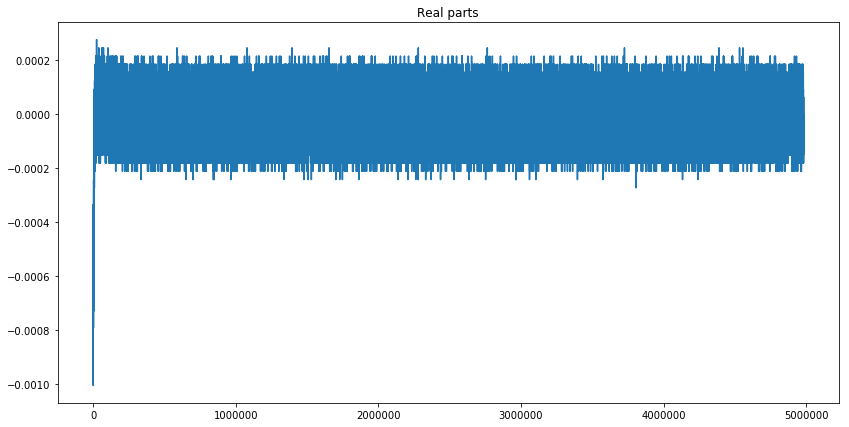

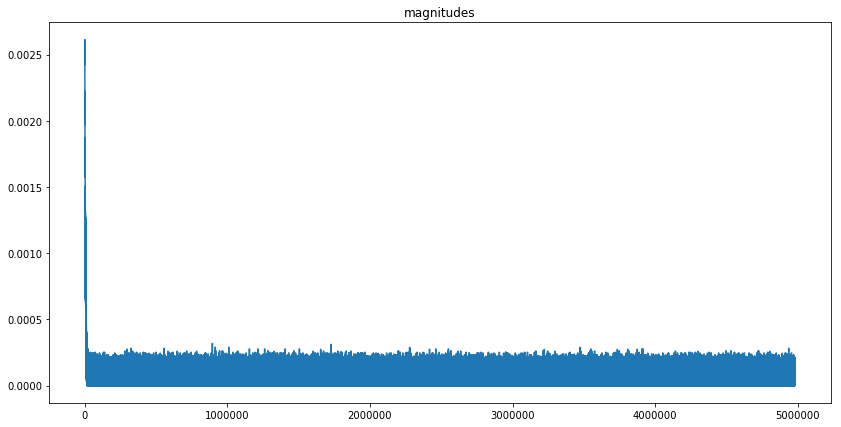

In [20]:
#reading indexes
freq_dist= np.arange(len(complex_samples))

#plotting the imaginary components
f_imag, ax_imag = plt.subplots(figsize = (14,7))
ax_imag.plot(freq_dist, complex_samples.imag)
ax_imag.set_title('imaginary parts')

#save images 
f_imag.savefig('images/raw_imaginaries.png')
f_imag.savefig('images/raw_imaginaries.jpg')

#Plotting the real components 
f_real, ax_real = plt.subplots(figsize = (14,7))
ax_real.plot(freq_dist,complex_samples.real, label = "real parts")
ax_real.set_title('Real parts')

#save plots
f_real.savefig('images/raw_reals.png')
f_real.savefig('images/raw_reals.jpg')


#Plotting magnitudes
f, ax = plt.subplots(figsize = (14,7))
ax.plot(freq_dist, np.absolute(complex_samples), label = "magnitudes")
ax.set_title('magnitudes')

#save images
f.savefig('images/raw_magnitudes.png')
f.savefig('images/raw_magnitudes.jpg')

plt.show()

In [19]:
%%cython
cimport numpy as npy
cmplx_samples_fft = npy.fft.fft(complex_samples)
cmplx_samples_fft


Error compiling Cython file:
------------------------------------------------------------
...
cimport numpy as npy
cmplx_samples_fft = npy.fft.fft(complex_samples)
                                              ^
------------------------------------------------------------

/Users/abdisamad/.ipython/cython/_cython_magic_4687ea17ef4c0a5a692f14d165bc2e02.pyx:2:47: undeclared name not builtin: complex_samples


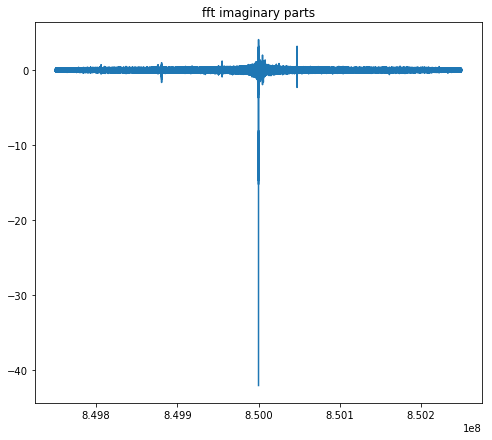

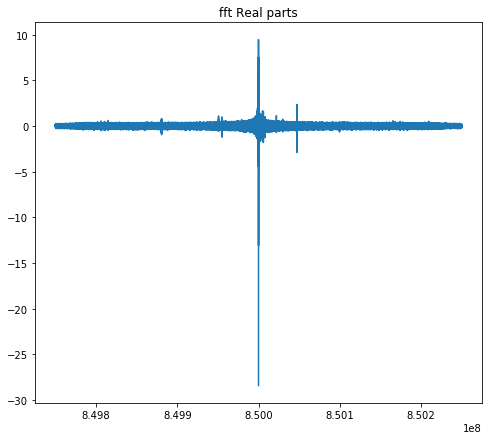

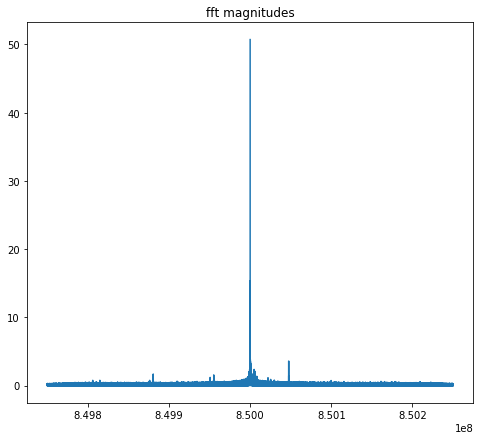

In [23]:
#Plotting fft results of the samples 

#reading indexes
freq = 850000000
N = len(complex_samples)
sample_spacing = 2e-06
freq_dist = np.fft.fftfreq(N,d= sample_spacing)
freq_dist = np.add(freq_dist, freq)

#plotting the imaginary components
f_imag, ax_imag = plt.subplots(figsize = (8,7))
ax_imag.plot(freq_dist, cmplx_samples_fft.imag)
ax_imag.set_title('fft imaginary parts')

#save images 
#f_imag.savefig('images/fft_imaginaries.png')
#f_imag.savefig('images/fft_imaginaries.jpg')

#Plotting the real components 
f_real, ax_real = plt.subplots(figsize = (8,7))
ax_real.plot(freq_dist,cmplx_samples_fft.real, label = "real parts")
ax_real.set_title('fft Real parts')

#save plots
#f_real.savefig('images/fft_reals.png')
#f_real.savefig('images/fft_reals.jpg')

#Plotting magnitudes
f, ax = plt.subplots(figsize = (8,7))
ax.plot(freq_dist, np.absolute(cmplx_samples_fft))
ax.set_title('fft magnitudes')

#save images
#f.savefig('images/fft_magnitudes.png')
#f.savefig('images/fft_magnitudes.jpg')


plt.show()

In [210]:
import time
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
class SampleFileAnalysis:
    def __init__(self, filename, center_freq=850e6, sample_rate=5e5, file_datatype = np.complex64):
        self.filename = filename;
        self.freq = center_freq;
        self.samp_rate = sample_rate
        self.cmplx_data = scipy.fromfile(open(filename), dtype = file_datatype)
        self.cmplx_data = np.decimate
        self.n = len(self.cmplx_data)
        self.samp_spacing = 1.0/self.samp_rate
    #Return the complex data from the provided file
    def raw_dataSegment(self, strt_cut = 0, end_cut = 0):
        return self.cmplx_data[strt_cut:self.n-end_cut];
    #Return the fft of a segment of the data
    def fftSegment(self, strt_cut = 0, end_cut = 0):
        cmplx_samples = self.cmplx_data[strt_cut:self.n-end_cut];
        return np.fft.ftt(cmplx_samples)
    
    #time series of the window sampling scans
    def time_segments(self):
        remains = self.n%self.samp_rate
        num_segments = self.n/self.samp_rate
        return self.cmplx_data[remains:].reshape(num_segments,self.samp_rate)
    #FFTs of the time series of the window sampling scans
    def time_segments_fft(self):
        segments = self.time_segments()
        return np.apply_along_axis(np.fft.fft, 1, segments)
    #Complex number to dB
    def complex_to_db(self,cmplx):
        return 20*np.log(np.absolute(cmplx))
    #Map Q,I to dB
    def segments_to_db(self, fft=False):
        segments = self.time_segments()
        if fft:
            segments = self.time_segments_fft()
        return np.apply_along_axis(self.complex_to_db, 0,segments)
    #Plots a segment of data using the specified file sample rate and center freq
    #Inputs:
        #segment-> 1d numpy array to be plotted
        #fft -> if True: calculates the corresponding frequencies using the sample rate and center frequency
                #otherwise uses the length of the segment to time index the data
        #indices: if not None use them as the x-coordinates 
        #title: The title of the figugre to be plotted
        #save_plot: if True saves the plot to save_to_as
        #save_to_as: expected: path/filename. defualts to current directory
    #output:
        #plots the segment provided
        #saves the plots to the specified file 
    def plot(self, segment, fft = False, indices = None, title = 'data segment', save_plot = False, save_to_as = 'segment'):
        samp_spacing = 1.0/self.samp_rate
        n = len(segment)
        h_data = indices
        if indices==None:
            if fft:
                h_data = np.add(np.fft.fftfreq(len(segment), d = samp_spacing), self.freq)
            else:
                h_data = np.arange(n)
        fig, ax = plt.subplots(figsize = (12,8))
        ax.plot(h_data, segment)
        ax.set_title(title)
        if save_to_as=='segment':
            save_to_as = save_to_as+'_'+str(int(time.time()))+'.jpg'
        if save_plot:
            fig.savefig(save_to_as)
        plt.show()
    #Converts from segment to frequency,power pairs
    def freq_to_power(self, segment):
        freq = np.add(np.fft.fftfreq(len(segment), d = self.samp_spacing),self.freq)
        pairs = np.vstack((segment.T,freq.T)).T
        return pd.DataFrame(pairs, columns=['Power(dB)','Freq'])
    #Map the windows of sample scans to dataframes
    def freq_pow_pairs_map(self, fft = True):
        segs = self.segments_to_db(fft=fft)
        
        dfs = pd.concat([self.freq_to_power(seg) for seg in segs])
        return dfs
    #Write the paired frequency, power components to a csv file
    def freq_pow_pair_to_csv(self,filename=None, fft=True):
        if filename==None:
            filename = self.filename.split('.')[0].strip()+"freq_pow_pairs"+'.csv'
        df = self.freq_pow_pairs_map(fft = fft)
        df.to_csv(filename)
        
        
            
        
            
    
        

In [208]:
samp_analizer = SampleFileAnalysis('thirdSample.32fc')

In [209]:
samp_analizer.freq_pow_pairs_map()

/Users/abdisamad/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:26: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


,Power(dB),Freq
0,89.571118,850000000.0
1,89.774817,850000001.0
2,89.688072,850000002.0
3,89.600778,850000003.0
4,89.165268,850000004.0
5,88.812395,850000005.0
6,88.612954,850000006.0
7,88.057276,850000007.0
8,87.753335,850000008.0
9,87.114999,850000009.0


In [203]:
samp_analizer.freq_pow_pairs_to_csv()

/Users/abdisamad/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:29: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


,Power(dB),Freq
0,89.571118,850000000.0
1,89.774817,850000001.0
2,89.688072,850000002.0
3,89.600778,850000003.0
4,89.165268,850000004.0
5,88.812395,850000005.0
6,88.612954,850000006.0
7,88.057276,850000007.0
8,87.753335,850000008.0
9,87.114999,850000009.0


In [161]:
segements = samp_analizer.segments_to_db()

/Users/abdisamad/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:27: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/abdisamad/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:33: RuntimeWarning: divide by zero encountered in log


In [162]:
segment_ffts = samp_analizer.segments_to_db(fft=True)
print segment_ffts.shape

/Users/abdisamad/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:27: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(10, 500000)


In [197]:
s1 =samp_analizer.freq_to_power(segment_ffts[0])
s2 =samp_analizer.freq_to_power(segment_ffts[1])
s1
#np.apply_along_axis(samp_analizer.freq_to_power, 0, [segment_ffts[0],segment_ffts[1]])

,Power(dB),Freq
0,89.571118,0.0
1,89.774817,1.0
2,89.688072,2.0
3,89.600778,3.0
4,89.165268,4.0
5,88.812395,5.0
6,88.612954,6.0
7,88.057276,7.0
8,87.753335,8.0
9,87.114999,9.0


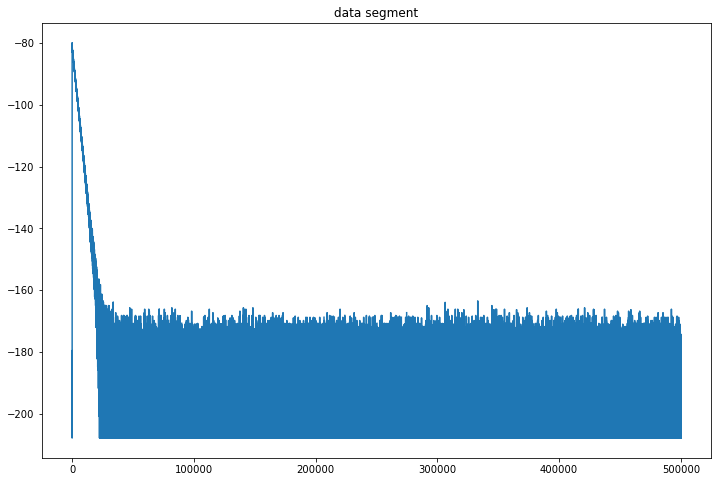

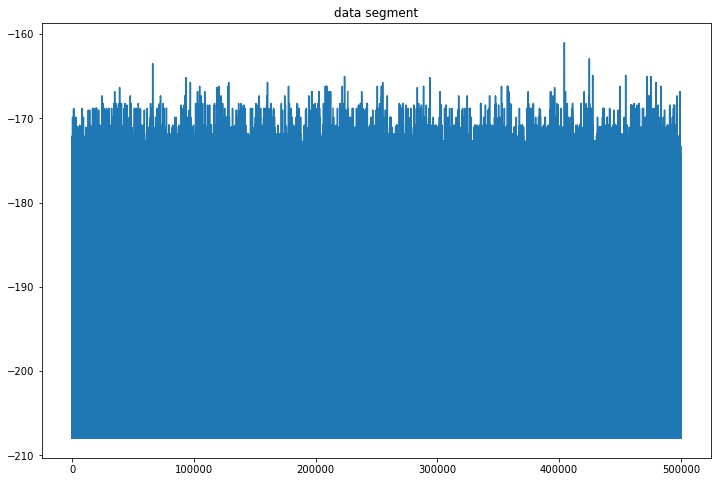

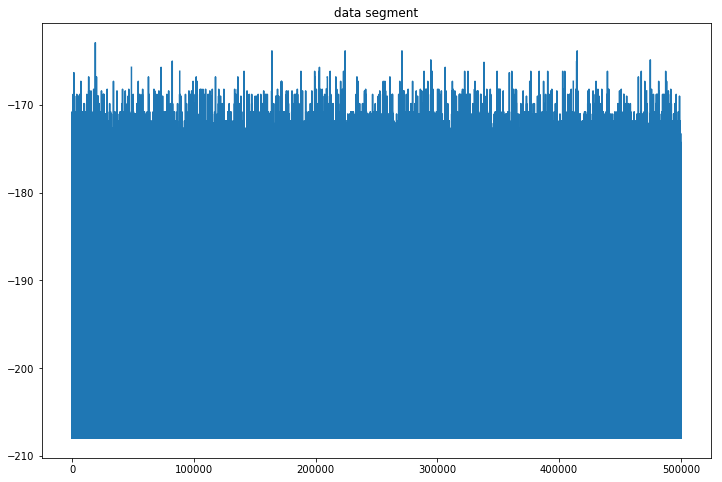

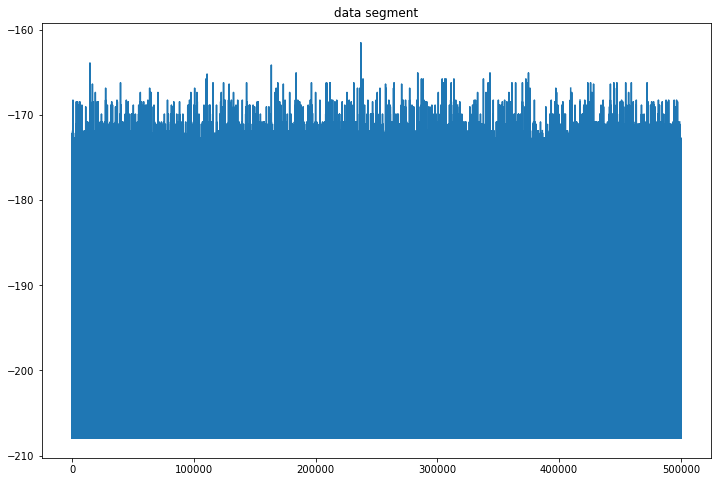

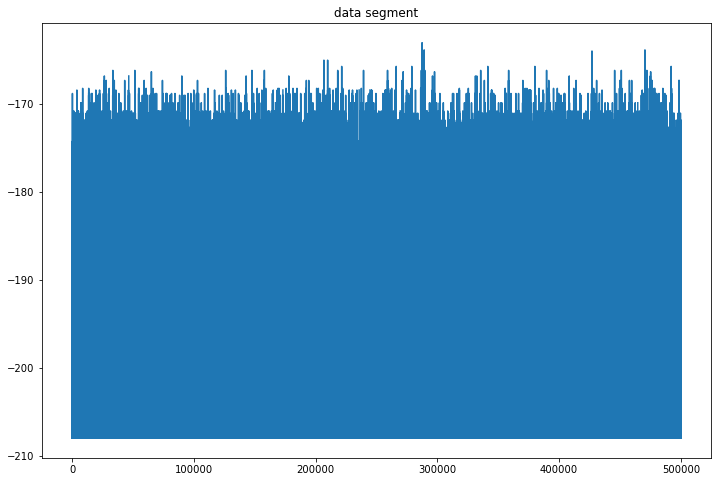

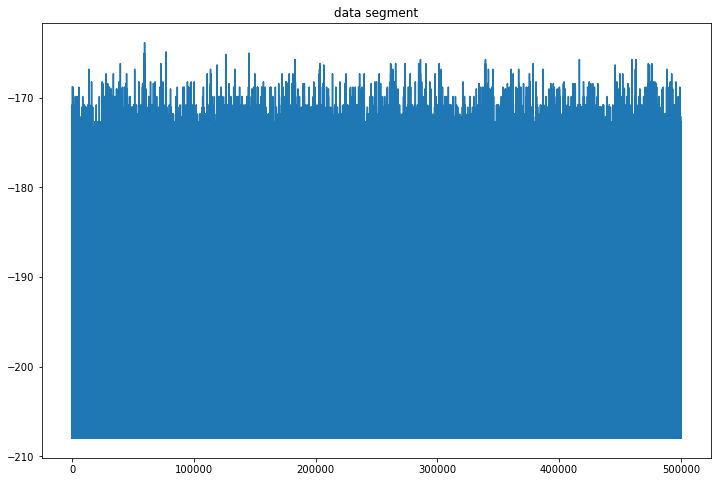

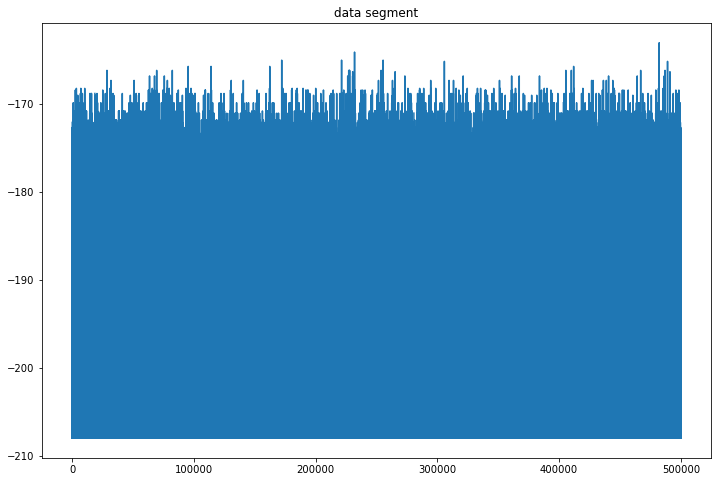

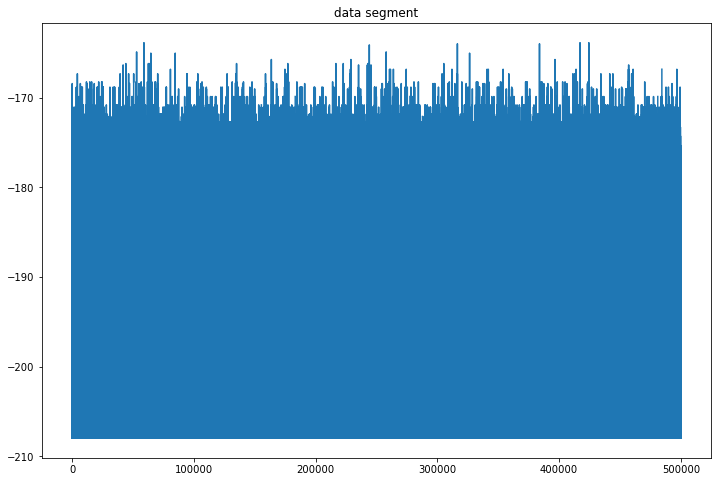

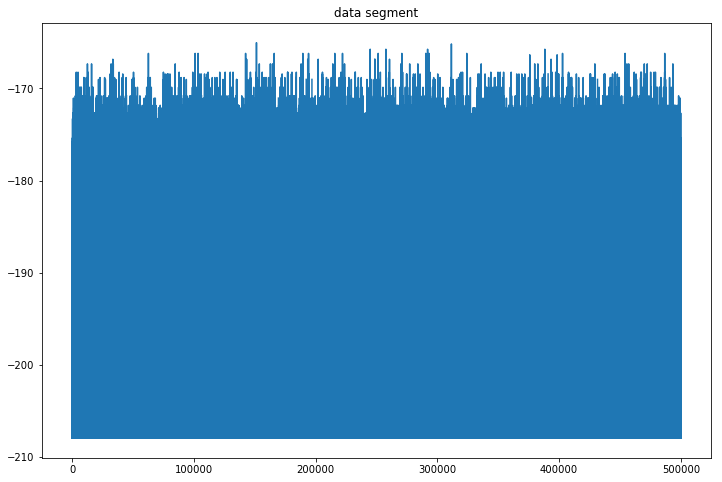

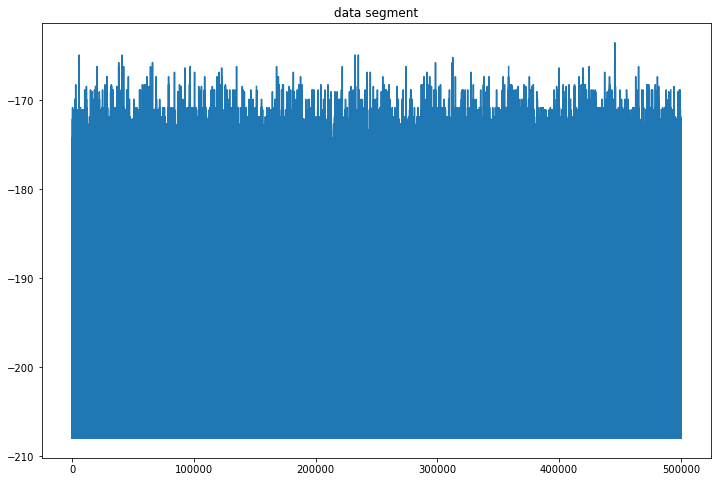

In [147]:
for segment in segements:
    samp_analizer.plot(segment)

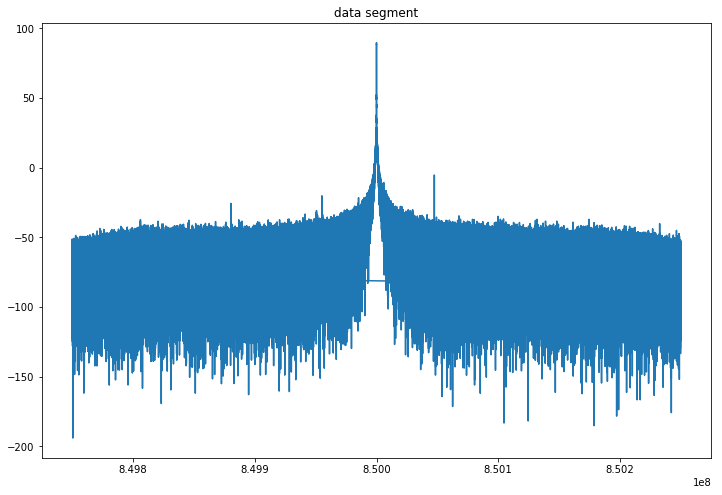

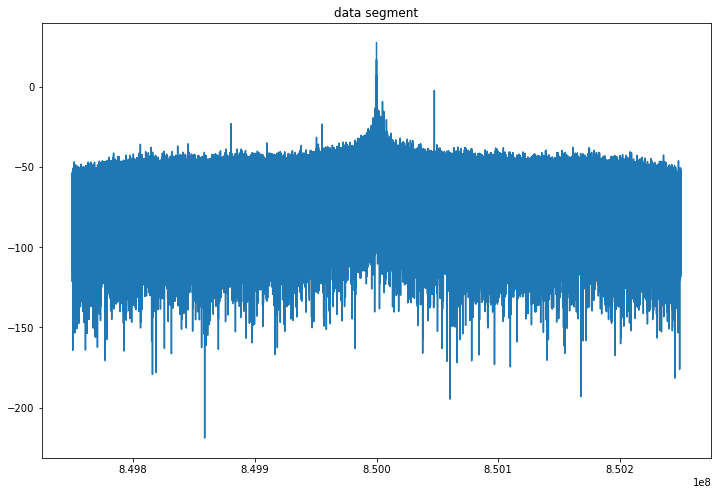

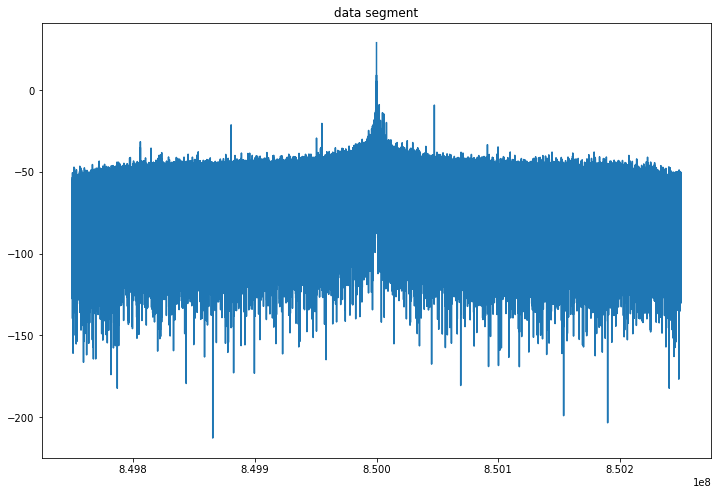

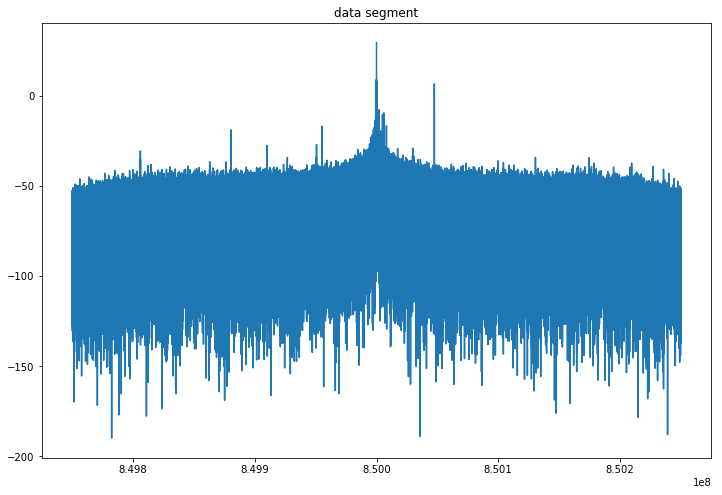

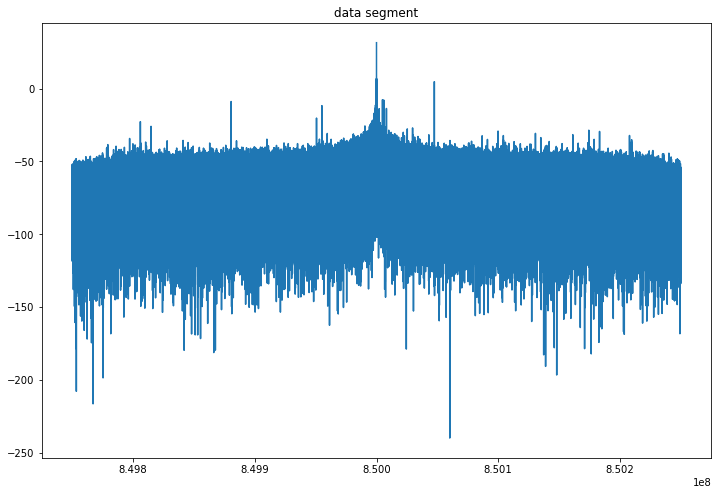

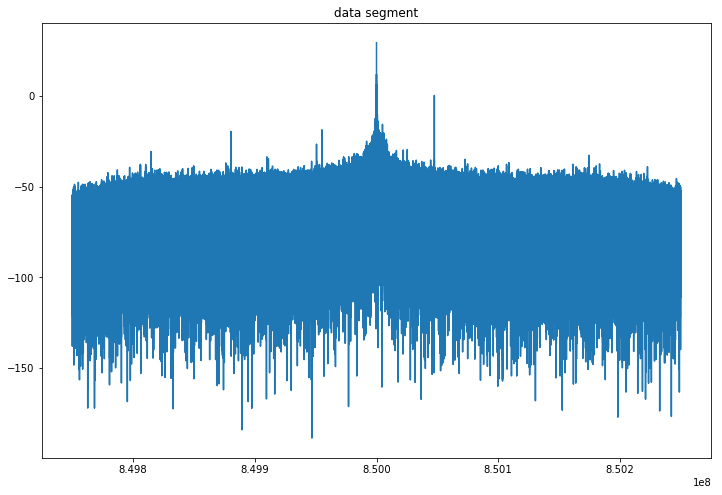

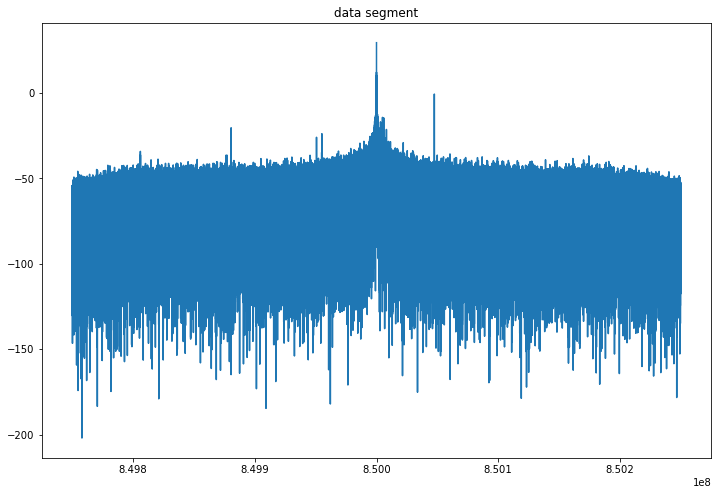

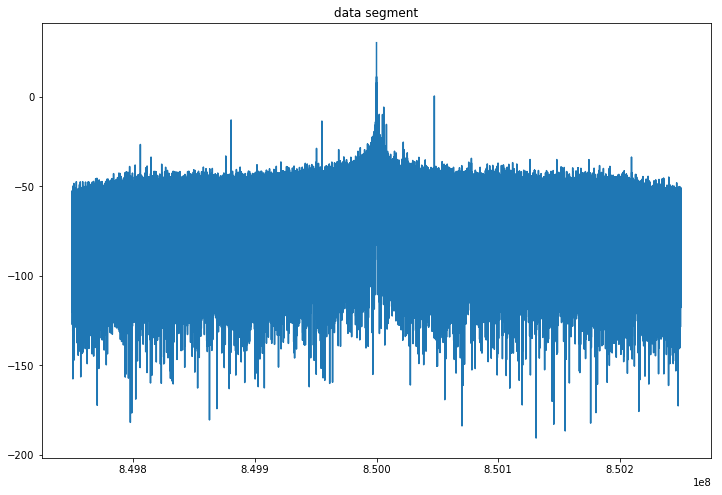

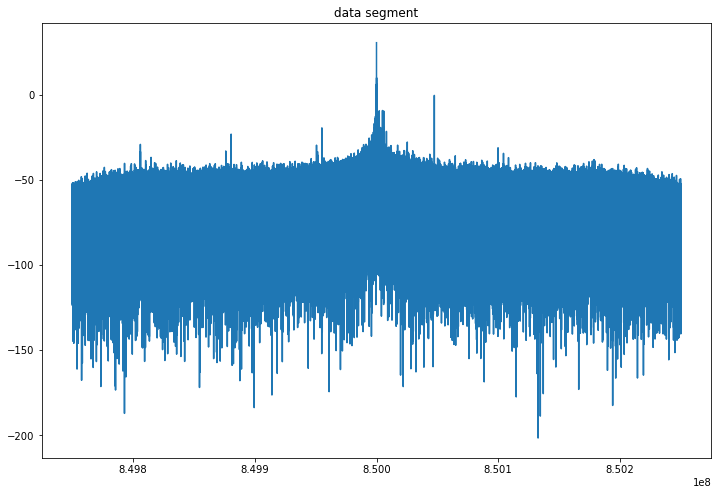

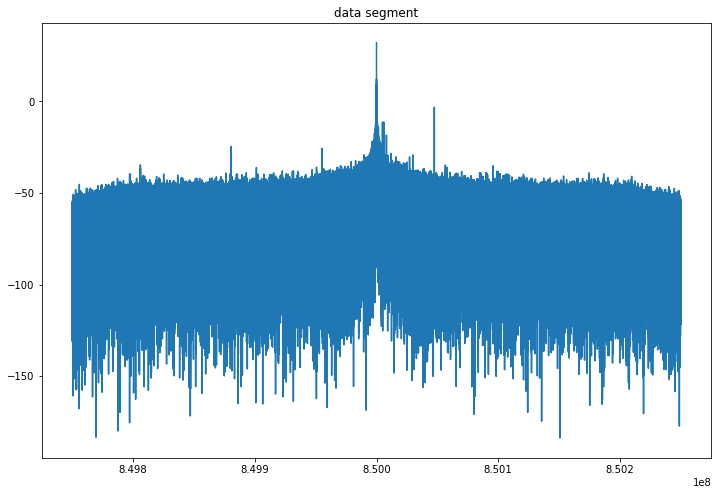

In [163]:
for segment in segment_ffts:
  
    samp_analizer.plot(segment, fft=True)

In [ ]:
def generatePlots(data, ftt = False, imag_labels = ['Imaginary Parts','Real Parts','Magnitudes'],
                  image_names = ['imaginaries', 'reals','magnitudes']):
    #Plotting fft results of the samples 

    #reading indexes
    freq_dist= np.arange(len(complex_samples))
    

    #plotting the imaginary components
    f_imag, ax_imag = plt.subplots(figsize = (14,7))
    ax_imag.plot(freq_dist, cmplx_samples_fft.imag)
    image_title = 'Imaginary parts'
    image_name = 'imaginaries'
    if fft:
        image_title = 'fft imaginary parts'
        image_name = 'fft_imaginaries'
    ax_imag.set_title('fft imaginary parts')

    #save images 
    f_imag.savefig('images/fft_imaginaries.png')
    f_imag.savefig('images/fft_imaginaries.jpg')

    #Plotting the real components 
    f_real, ax_real = plt.subplots(figsize = (14,7))
    ax_real.plot(freq_dist,cmplx_samples_fft.real, label = "real parts")
    ax_real.set_title('fft Real parts')
    
    image_title = 'Real Parts'
    image_name = 'reals'
    if fft:
        image_title = 'ftt Real Parts'
        image_name = 'fft_reals'
    #save plots
    f_real.savefig('images/fft_reals.png')
    f_real.savefig('images/fft_reals.jpg')

    #Plotting magnitudes
    f, ax = plt.subplots(figsize = (14,7))
    ax.plot(freq_dist, np.absolute(cmplx_samples_fft))
    
    ax.set_title('fft magnitudes')
    
    image_title = 'magnitudes'
    image_name = 'magnitudes'
    if fft:
        image_title = 'fft magnitudes'
        image_name = 'fft_magnitudes'
    #save images
    f.savefig('images/fft_magnitudes.png')
    f.savefig('images/fft_magnitudes.jpg')


    plt.show()


In [ ]:
sample_compl[0:30]

In [ ]:
low = 0
high = 10000
for i in range(len(sample_file)/10000):
    plt.plot(range(len(np.absolute(sample_file)[low:high])),np.absolute(sample_file.real[low:high]))
    low+=10000
    high+=10000
#plt.plot(range(len(np.absolute(sample_file)[low:high])),sample_file.real[low:high])
#plt.plot(range(len(np.absolute(sample_file)[low:high])),np.absolute(sample_file)[low:high])
    plt.show()

In [ ]:
from gnuradio.blocks import file_meta_source

In [ ]:
If you want to use the GNU tools by default, add this directory to the front of your PATH environment variable:
        /opt/local/libexec/gnubin/

In [ ]:
sample_part = sample_file[0:5000100]
print "sample_part: ", sample_part, "sample_part_len: ",len(sample_part) 
print "samples_file: ", sample_file, "sample_file_len: ",len(sample_file)
fft = np.fft.fft(sample_part, n = 2*len(sample_part))

In [ ]:
fft

In [ ]:
freq = range(len(fft))
#freq = np.fft.fftfreq(freq)
#plt.plot(freq, fft.real, freq, fft.imag, freq, np.absolute(fft))
low = 0
high = 1000
chuck = high-low
for i in range(len(freq)/chuck):
    plt.plot(freq[low:high], np.absolute(fft[low:high]))
    low+=chuck
    high+=chuck
    plt.show()
    

In [ ]:
def compute(string_freq, sample_rate, num_samples)

In [ ]:
#freq taken parameters
freq = 850000000
sample_rate = 500000
num_samples = 5000000
low = 0
high = 1000


In [ ]:
low = 0
high = 100
for i in range(len(sample_file)/10000):
    plt.plot(range(len(np.absolute(sample_file)[low:high])),np.absolute(sample_file.real[low:high]))
    low+=100
    high+=100
#plt.plot(range(len(np.absolute(sample_file)[low:high])),sample_file.real[low:high])
#plt.plot(range(len(np.absolute(sample_file)[low:high])),np.absolute(sample_file)[low:high])
    plt.show()

In [ ]:
arange = np.arange(100).shape[-1]
arange

In [ ]:
#!/opt/local/bin/python2.7
import gnuradio

In [70]:
a = np.arange(6)
b = np.arange(6)*8
c = np.vstack((a.T,b.T))
d = np.vstack((c,a*3))
a.reshape(2,3)

array([[0, 1, 2],
       [3, 4, 5]])

In [167]:
import pandas as pd
pd.DataFrame(c.T)

,0,1
0,0,0
1,1,8
2,2,16
3,3,24
4,4,32
5,5,40


In [120]:
x = np.complex64(4+2j)

In [124]:
np.apply_along_axis(np.sqrt,0,d)

array([[ 0.        ,  1.        ,  1.41421356,  1.73205081,  2.        ,
         2.23606798],
       [ 0.        ,  2.82842712,  4.        ,  4.89897949,  5.65685425,
         6.32455532],
       [ 0.        ,  1.73205081,  2.44948974,  3.        ,  3.46410162,
         3.87298335]])

In [211]:
import argparse

In [ ]:
def myArgparser():
    parser = argparse.ArgumentParser(description='Processing byte stream files from uhd.')
    

In [ ]:
'''
Notes
1. Numpy speed up
    a. Cython
    b. Canopy or anacoda
    b. Multi-core use: https://roman-kh.github.io/numpy-multicore/
    

'''